<a href="https://colab.research.google.com/github/SubbulakshmiSN/Adaboost_Regressor_salary_prediction/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *`IMPORT LIBRARIES`*

In [1]:

import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


# *`DATA READING`*

In [2]:
df= pd.read_csv("/content/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


# *`DATA OBSERVATION`*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
columns=["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location", "company_size","remote_ratio", "salary", "salary_in_usd"]
for i in columns:
  print(i)
  print(df[i].unique())
  print("-----------------------------")

work_year
[2024 2023 2022 2020 2021]
-----------------------------
experience_level
['SE' 'MI' 'EN' 'EX']
-----------------------------
employment_type
['FT' 'CT' 'PT' 'FL']
-----------------------------
job_title
['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst'
 'Data Product M

In [7]:
'''
category columns:

1. experience_level
2. employment_type
3. job_title
4. salary_currency
5. employee_residence
6. company_location
7. company_size
8. remote_ratio
9. work_year

numeric columns:

1. salary
2. salary_in_usd


'''

'\ncategory columns:\n\n1. experience_level\n2. employment_type\n3. job_title\n4. salary_currency\n5. employee_residence\n6. company_location\n7. company_size\n8. remote_ratio\n\nnumeric columns:\n\n1. salary\n2. salary_in_usd\n\n\n'

# *`DATA HANDLING`*



In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df['job_title'] = df['job_title'].replace({'Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Researcher': 'ML Engineer',
                                           'Machine Learning Research Engineer': 'ML Engineer',
                                           'MLOps Engineer' : 'ML Engineer',
                                           'ML Ops Engineer' : 'ML Engineer',
                                           'Lead Machine Learning Engineer' : 'ML Engineer',
                                           'Head of Machine Learning' : 'ML Engineer',
                                           'Machine Learning Operations Engineer' : 'ML Engineer',
                                           'Machine Learning Infrastructure Engineer' : 'ML Engineer',
                                           'Machine Learning Modeler' : 'ML Engineer',
                                           'Machine Learning Software Engineer' : 'ML Engineer',
                                           'Applied Machine Learning Scientist' : 'ML Engineer',
                                           'Machine Learning Manager' : 'ML Engineer',
                                           'Principal Machine Learning Engineer' : 'ML Engineer',
                                           'Staff Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Specialist' : 'ML Engineer',
                                           'Machine Learning Developer' : 'ML Engineer',
                                           'Applied Machine Learning Engineer' : 'ML Engineer',
                                           'Machine Learning Scientist' : 'ML Engineer',

                                           'Data Management Analyst' : 'Data Analyst',
                                           'Data Operations Analyst' : 'Data Analyst',
                                           'Data Quality Analyst' : 'Data Analyst',
                                           'Admin & Data Analyst' : 'Data Analyst',
                                           'Data Analyst Lead' : 'Data Analyst',
                                           'Lead Data Analyst' : 'Data Analyst',
                                           'Business Data Analyst' : 'Data Analyst',
                                           'Financial Data Analyst' : 'Data Analyst',
                                           'Staff Data Analyst' : 'Data Analyst',
                                           'Business Intelligence Data Analyst' : 'Data Analyst',
                                           'Finance Data Analyst' : 'Data Analyst',
                                           'Compliance Data Analyst' : 'Data Analyst',
                                           'Product Data Analyst' : 'Data Analyst',
                                           'Data Visualization Analyst' : 'Data Analyst',
                                           'Sales Data Analyst' : 'Data Analyst',
                                           'Marketing Data Analyst' : 'Data Analyst',
                                           'Principal Data Analyst' : 'Data Analyst',

                                           'Data Science Manager' : 'Data Science',
                                           'Data Science Consultant' : 'Data Science',
                                           'Data Science Director' : 'Data Science',
                                           'Data Science Engineer' : 'Data Science',
                                           'Data Science Practitioner' : 'Data Science',
                                           'Data Science Lead' : 'Data Science',
                                           'Director of Data Science' : 'Data Science',
                                           'Managing Director Data Science' : 'Data Science',
                                           'Head of Data Science' : 'Data Science',
                                           'Data Science Tech Lead' : 'Data Science',

                                           'Marketing Data Scientist' : 'Data Scientist',
                                           'Principal Data Scientist' : 'Data Scientist',
                                           'Applied Data Scientist' : 'Data Scientist',
                                           'Lead Data Scientist' : 'Data Scientist',
                                           'Staff Data Scientist' : 'Data Scientist',
                                           'Data Scientist Lead' : 'Data Scientist',

                                           'AI Architect' : 'AI Engineer',
                                           'AI Software Engineer' : 'AI Engineer',
                                           'AI Research Scientist' : 'AI Engineer',
                                           'AI Research Engineer' : 'AI Engineer',
                                           'AI Programmer' : 'AI Engineer',
                                           'AI Product Manager' : 'AI Engineer',
                                           'AI Developer' : 'AI Engineer',
                                           'AI Scientist' : 'AI Engineer'

                                          })


In [10]:
df.job_title.unique()

array(['AI Engineer', 'ML Engineer', 'Business Intelligence Developer',
       'Data Engineer', 'Data Scientist', 'Cloud Database Engineer',
       'Research Engineer', 'Data Analyst', 'Applied Scientist',
       'Data Science', 'Research Scientist', 'Prompt Engineer',
       'Research Analyst', 'Data Management Consultant',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Architect', 'Data Manager', 'Robotics Software Engineer',
       'Data DevOps Engineer', 'Business Intelligence',
       'Data Integration Engineer', 'Data Operations Specialist',
       'BI Analyst', 'Data Product Manager',
       'Business Intelligence Engineer', 'Data Specialist',
       'Data Strategist', 'Big Data Developer', 'BI Developer',
       'Quantitative Research Analyst', 'Data Infrastructure Engineer',
       'Data Analytics Lead', 'Business Intelligence Manager',
       'Data Analytics Manager', 'Data Developer',
       'Data Analytics Consultant', 'Data Analytics Specialist'

# *`DATA VISUALIZATION`*

In [14]:

fig_box=px.box(df,
                x='work_year',
                y='salary_in_usd',
                color='work_year',

title='Salary in USD over the years')
fig_box.show()

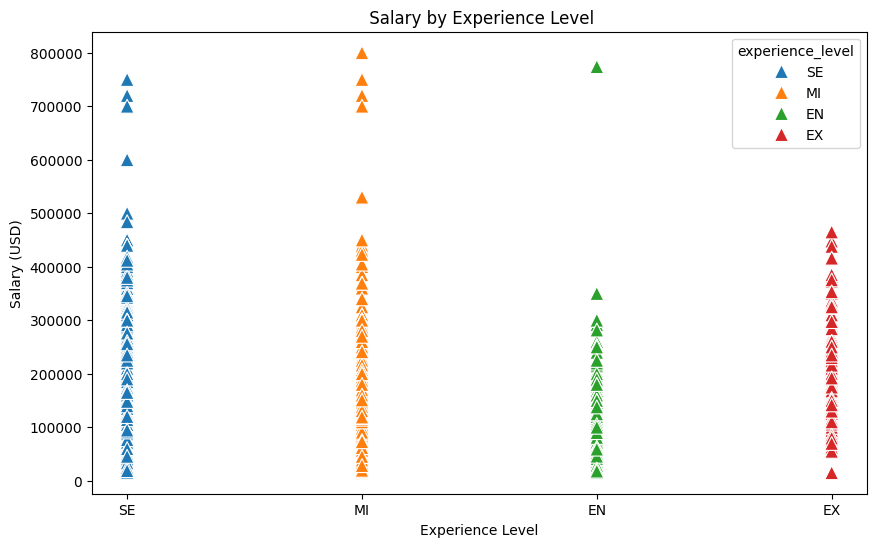

In [25]:
# Box Plot of Salary by Experience Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='experience_level', y='salary_in_usd', hue='experience_level',marker="^", s=100)
plt.title(' Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

In [29]:
avg_salary_by_emp_type = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()


fig = px.bar(avg_salary_by_emp_type,
             x='salary_in_usd',
             y='employment_type',
             color='salary_in_usd',
             labels={"employment_type": "Employment Type", "salary_in_usd": "Average Salary (USD)"},
             title="Bar Plot of Average Salary by Employment Type")
fig.show()

In [23]:
fig8 = px.scatter(df, x="job_title",
                  y="salary_in_usd",
                  color="job_title",
                  hover_name="job_title",
                  title="Salary by Job Title")
fig8.show()

In [31]:
ct = pd.crosstab(df['company_size'], df['remote_ratio'])
ct.reset_index(inplace=True)

ct_melted = pd.melt(ct, id_vars='company_size', var_name='remote_ratio', value_name='count')

fig = px.bar(ct_melted,
             x='company_size',
             y='count',
             color='remote_ratio',
             title=' Remote Ratio by Company Size',
             labels={"company_size": "Company Size", "count": "Count", "remote_ratio": "Remote Ratio"},
             barmode='stack')
fig.show()

# *`DATA PREPROCESSING`*

In [32]:
columns=['experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence',
       'company_location', 'company_size']

encoder = OrdinalEncoder()
for i in columns:
  df[i] = encoder.fit_transform(df[[i]])

In [33]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,3.0,2.0,0.0,90000,21.0,90000,1.0,0,1.0,0.0
1,2024,3.0,2.0,71.0,180500,21.0,180500,84.0,0,74.0,1.0
2,2024,3.0,2.0,71.0,96200,21.0,96200,84.0,0,74.0,1.0
3,2024,3.0,2.0,71.0,235000,21.0,235000,6.0,0,6.0,1.0
4,2024,3.0,2.0,71.0,175000,21.0,175000,6.0,0,6.0,1.0


# *`MACHINE LEARNING`*

In [ ]:
'''
supervised learning
Target = "salary_in_usd"
continuous target hence using Regressor algo for training model

'''

In [38]:
#separating independent and dependent

x = df.drop(["salary", "salary_currency", "salary_in_usd"], axis = 1)
y = df["salary_in_usd"]

#splitting test train data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)

# training
model = AdaBoostRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

#evaluation
mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error :",mse)

input = np.array([[2024, 2, 3, 24, 85, 50, 66, 0]])
prediction = model.predict(input)
print("\nSalary Predicted :",prediction)

mean_squared_error : 4598744258.76525

Salary Predicted : [150736.60520347]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names

